In [7]:
import numpy as np
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timezone
from scipy import signal

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'

# color line by depth
x = np.linspace(0.0, 1.0, 15)
clrs = matplotlib.colormaps['winter'](x)
x = np.arange(-20,-5,1)

In [8]:
# plot example of KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
h_kno = int(depth[-20])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_kno,psd_kno = signal.welch(rawstrain[:,-20],fs=metadata['fs'],window='hann',nperseg=metadata['fs']*60,detrend=False)
psd_kno_raw = 20*np.log10(psd_kno); # dB rel uE

# plot example of duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
h_duck = int(depth[int(nx/2)])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_duck,psd_duck = signal.welch(rawstrain[:,int(nx/2)],fs=metadata['fs'],window='hann',nperseg=metadata['fs']*60,detrend=False)
psd_duck_raw = 20*np.log10(psd_duck); # dB rel uE

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
frq_oli,psd_oli = signal.welch(rawstrain,fs=metadata['fs'],window='hann',nperseg=metadata['fs']*60,detrend=False)
psd_oli_raw = 20*np.log10(psd_oli); # dB rel uE

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
h_flo = -20
rawstrain = (rawstrain - rawstrain[0,:])/(1e-4) #microStrain
frq_flo,psd_flo = signal.welch(rawstrain[:,int(nx/2)],fs=metadata['fs'],window='hann',nperseg=metadata['fs']*60,detrend=False)
psd_flo_raw = 20*np.log10(psd_flo); # dB rel uE


/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:241: RuntimeWarning: overflow encountered in cosh
  dfdk = - g * np.tanh(k * h) - g * h * k * (1 / np.cosh(k * h)) ** 2
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:467: RuntimeWarning: overflow encountered in cosh
  attenuation = np.cosh(h/L)**2 # square for energy
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:467: RuntimeWarning: overflow encountered in square
  attenuation = np.cosh(h/L)**2 # square for energy


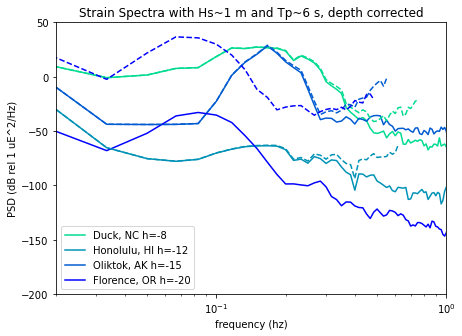

In [9]:
# NOW CORRECTED FOR DEPTH
# plot example of KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
h_kno = int(depth[-20])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_kno, psd_kno = odas.surfaceSpec(rawstrain[:,-20], metadata['fs'],h_kno)

# plot example of duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
h_duck = int(depth[int(nx/2)])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_duck,psd_duck = odas.surfaceSpec(rawstrain[:,int(nx/2)], metadata['fs'],h_duck)

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
frq_oli,psd_oli = odas.surfaceSpec(rawstrain, metadata['fs'], h_oli)

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
ns,nx = rawstrain.shape
h_flo = -20# int(depth[int(nx/2)])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
# Calculate depth attenuation function to translate buoy surface to pressure at bed
frq_flo,psd_flo = odas.surfaceSpec(rawstrain[:,int(nx/2)], metadata['fs'],h_flo)


plt.figure(figsize=(7,5))
plt.plot(frq_duck,psd_duck_raw,label='Duck, NC h='+ str(h_duck),c = clrs[x==h_duck,:])
plt.plot(frq_kno,psd_kno_raw,label='Honolulu, HI h='+ str(h_kno),c = clrs[x==h_kno,:])
plt.plot(frq_oli,psd_oli_raw,label='Oliktok, AK h='+ str(h_oli),c = clrs[x==h_oli,:])
plt.plot(frq_flo,psd_flo_raw,label='Florence, OR h='+ str(h_flo),c = clrs[x==h_flo,:])

plt.plot(frq_duck,psd_duck,c = clrs[x==h_duck,:],linestyle='dashed')
plt.plot(frq_kno,psd_kno,c = clrs[x==h_kno,:],linestyle='dashed')
plt.plot(frq_oli,psd_oli,c = clrs[x==h_oli,:],linestyle='dashed')
plt.plot(frq_flo,psd_flo,c = clrs[x==h_flo,:],linestyle='dashed')
plt.legend()
plt.xscale('log')
plt.xlim([0.02,1])
plt.xlabel('frequency (hz)')
plt.ylabel('PSD (dB rel 1 uE^2/Hz)')
plt.ylim([-200,50])
plt.title('Strain Spectra with Hs~1 m and Tp~6 s, depth corrected')
# plt.show()
plt.savefig('figs/strainH1T6_depthcorr.pdf')